In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sqlalchemy import create_engine #Create PostgreSQL connection
from urllib.parse import quote_plus #Safety encode for special characters in password for me

In [4]:
username = 'postgres'
password = 'Amar020212@'
host = 'localhost'
port = 5432
database = 'ecommerce'

engine_url = f'postgresql+psycopg2://{username}:{quote_plus(password)}@{host}:{port}/{database}'
engine = create_engine(engine_url)

**Successfully Connected to Postgre SQL Server**

In [10]:
customers = pd.read_csv("C:/Users/AHK/Desktop/Complete Projects/4th-eCommerce/Datasets/customers.csv")
geolocation = pd.read_csv("C:/Users/AHK/Desktop/Complete Projects/4th-eCommerce/Datasets/geolocation.csv")
order_items = pd.read_csv("C:/Users/AHK/Desktop/Complete Projects/4th-eCommerce/Datasets/order_items.csv")
orders = pd.read_csv("C:/Users/AHK/Desktop/Complete Projects/4th-eCommerce/Datasets/orders.csv")
payments = pd.read_csv("C:/Users/AHK/Desktop/Complete Projects/4th-eCommerce/Datasets/payments.csv")
products = pd.read_csv("C:/Users/AHK/Desktop/Complete Projects/4th-eCommerce/Datasets/products.csv")
sellers = pd.read_csv("C:/Users/AHK/Desktop/Complete Projects/4th-eCommerce/Datasets/sellers.csv")

**Checking the data imported or not into the tables**

In [15]:
print(customers.shape)
print(geolocation.shape)
print(order_items.shape)
print(payments.shape)
print(products.shape)
print(sellers.shape)

(99441, 5)
(1000163, 5)
(112650, 7)
(103886, 5)
(32951, 9)
(3095, 4)


**Completed Reading CSV Files**

**Now, Creating Tables & importing data into SQL Database**

In [11]:
customers.to_sql('customers',engine,if_exists='replace',index=False)
geolocation.to_sql('geolocation',engine,if_exists='replace',index=False)
order_items.to_sql('order_items',engine,if_exists='replace',index=False)
payments.to_sql('payments',engine,if_exists='replace',index=False)
products.to_sql('products',engine,if_exists='replace',index=False)
sellers.to_sql('sellers',engine,if_exists='replace',index=False)

95

**cross checked in sql , tables been imported to SQL**

**Forgot to import 1 table 'order' - Lets import that**

In [17]:
orders.to_sql('orders',engine,if_exists='replace',index=False)

441

**DUMPPED DATA TO SQL**

# Now Run The SQL Queries

# Basic Queries

***1) List all unique cities where customers are located.***

In [18]:
customers.columns #checking the column names

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [19]:
query = "SELECT DISTINCT(customer_city) FROM customers"

pd.read_sql(query,engine)

,customer_city
0,bom jardim de minas
1,alto rio doce
2,alvorada do gurgueia
3,batatais
4,capao da porteira
...,...
4114,carbonita
4115,concordia do para
4116,independencia
4117,governador valadares


In [20]:
#Need Out put in list wise cities
df = pd.read_sql(query,engine)
unique_city_list = df['customer_city'].tolist()
unique_city_list

['bom jardim de minas',
 'alto rio doce',
 'alvorada do gurgueia',
 'batatais',
 'capao da porteira',
 'icatu',
 'osorio',
 'populina',
 'novo mundo',
 'tururu',
 "alta floresta d'oeste",
 'cajamar',
 'presidente lucena',
 'santa maria do salto',
 'cacador',
 'araxa',
 'carnaubais',
 'lindolfo collor',
 'japira',
 'botelho',
 'tabapua',
 'joao camara',
 'barrolandia',
 'nepomuceno',
 'ibertioga',
 'frei lagonegro',
 'sao jose da barra',
 'pitangui',
 'jaragua do sul',
 'ervalia',
 'governador celso ramos',
 'santa ernestina',
 'quatro bocas',
 'grao mogol',
 'diamantina',
 'itaju',
 'tiradentes',
 'junqueiro',
 'macambira',
 'barauna',
 'ibirapua',
 'uniao do sul',
 'palma',
 'agrolandia',
 'bom jesus da serra',
 'surubim',
 'unai',
 'formosa do rio preto',
 'medianeira',
 'japoata',
 'emilianopolis',
 'lupionopolis',
 'ivai',
 'picui',
 'cabeceira grande',
 'narandiba',
 'vila flores',
 'iraucuba',
 'dobrada',
 'uniao de minas',
 'vargem alta',
 'quintana',
 'jiquirica',
 'bequimao',


***2) Count the number of orders placed in 2017***

In [32]:
query = """SELECT COUNT(order_id) 
        FROM orders 
        WHERE EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) = 2017;"""

df= pd.read_sql(query,engine)
print('total number of order placed in 2017 are ',df.iloc[0,0])

total number of order placed in 2017 are  45101


***3) Find the total sales per category.***

In [54]:
query = """SELECT pd.product_category, ROUND(SUM(pm.payment_value)::numeric,2) AS total_sales
        FROM products AS pd
        INNER JOIN order_items AS o
        ON pd.product_id = o.product_id
        INNER JOIN payments as pm
        ON o.order_id = pm.order_id
        GROUP BY 1;"""

df= pd.read_sql(query,engine)
df

,product_category,total_sales
0,Agro Industria e Comercio,118730.61
1,Art,30992.93
2,Arts and Crafts,2326.17
3,audio,60324.62
4,automotive,852294.33
...,...,...
69,technical books,24915.44
70,telephony,486882.05
71,toys,619037.69
72,Watches present,1429216.68


***4) Calculate the percentage of orders that were paid in installments***

In [55]:
query = """SELECT (100*(SUM(CASE WHEN payment_installments>=1 THEN 1 ELSE 0 END)::numeric)/COUNT(*))
        AS percentage_of_orders
        FROM payments;"""

pd.read_sql(query,engine)

,percentage_of_orders
0,99.998075


***5) Count the number of customers from each state.***

In [80]:
query = """SELECT customer_state, COUNT(customer_id) AS no_of_customers
        FROM customers
        GROUP BY 1;"""

df=pd.read_sql(query,engine)
df

,customer_state,no_of_customers
0,RS,5466
1,SC,3637
2,DF,2140
3,MG,11635
4,RN,485
5,SP,41746
6,GO,2020
7,AM,148
8,PA,975
9,PB,536


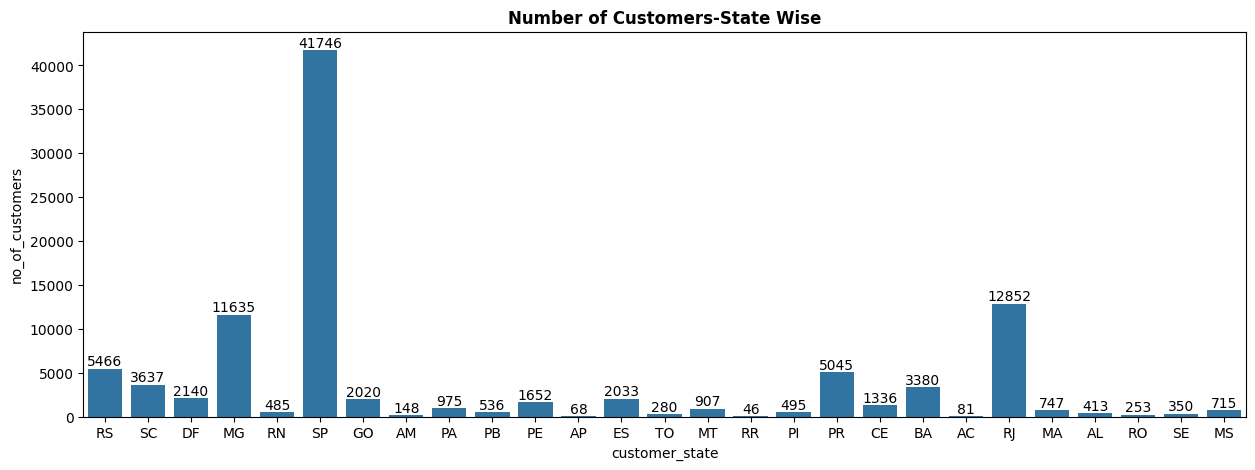

In [82]:
plt.figure(figsize=(15,5))
ax=sns.barplot(data=df,x='customer_state',y='no_of_customers')
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Number of Customers-State Wise',fontweight='bold')
plt.show()

# Intermediate Queries

***1) Calculate the number of orders per month in 2018.***

In [72]:
query = """SELECT TO_CHAR(order_purchase_timestamp::timestamp, 'Month') AS month_name,COUNT(order_id) AS no_of_orders
        FROM orders
        WHERE EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) = 2018
        GROUP BY 1
        ORDER BY MIN(order_purchase_timestamp::timestamp);"""

df= pd.read_sql(query,engine)
df

,month_name,no_of_orders
0,January,7269
1,February,6728
2,March,7211
3,April,6939
4,May,6873
5,June,6167
6,July,6292
7,August,6512
8,September,16
9,October,4


Ploting In Graphs

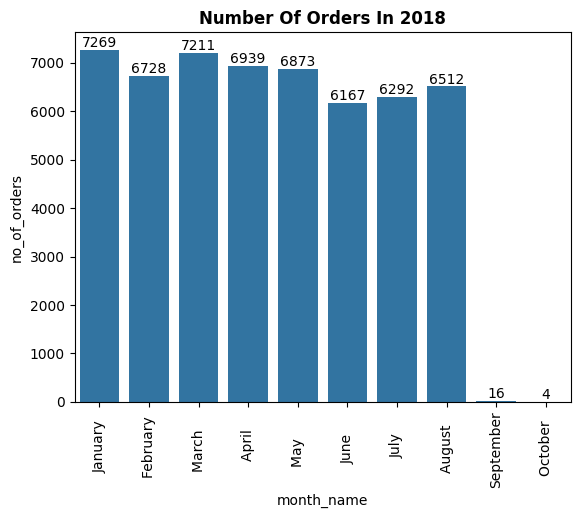

In [77]:
ax=sns.barplot(data = df, x= 'month_name', y = 'no_of_orders')
plt.xticks(rotation=90)
plt.title('Number Of Orders In 2018',fontweight='bold')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

***2) Find the average number of products per order, grouped by customer city.***

In [86]:
query = """WITH count_orders AS
	(
	SELECT o.order_id,o.customer_id,COUNT(oi.order_item_id) AS oc
	FROM orders as o
	INNER JOIN order_items as oi
	ON o.order_id = oi.order_id
	GROUP BY 1,2
	)

SELECT c.customer_city,ROUND(AVG(co.oc),2) AS avg_no_orders
FROM customers as c
INNER JOIN count_orders as co
ON c.customer_id = co.customer_id
GROUP BY 1
ORDER BY 2 DESC;"""

df=pd.read_sql(query,engine)

df

,customer_city,avg_no_orders
0,padre carvalho,7.0
1,celso ramos,6.5
2,candido godoi,6.0
3,datas,6.0
4,matias olimpio,5.0
...,...,...
4105,sao joao evangelista,1.0
4106,araponga,1.0
4107,arraias,1.0
4108,zacarias,1.0


***3) Calculate the percentage of total revenue contributed by each product category.***

In [94]:
query = """WITH total_rev AS
(
	SELECT pd.product_category,ROUND(SUM(pm.payment_value::numeric),2) AS total_revenue
	FROM products AS pd
	INNER JOIN order_items as oi
	ON pd.product_id = oi.product_id
	INNER JOIN payments as pm
	ON oi.order_id = pm.order_id
	GROUP BY 1
)

SELECT product_category,ROUND(100*(total_revenue/(SELECT SUM(payment_value) FROM payments))::numeric,2) AS Percentage_of_total_revenue
FROM total_rev
ORDER BY 2 DESC;"""

df=pd.read_sql(query,engine)
df['product_category'] = df['product_category'].str.upper()
df

,product_category,percentage_of_total_revenue
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,FLOWERS,0.01
71,ARTS AND CRAFTS,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


***4) Identify the correlation between product price and the number of times a product has been purchased.***

In [99]:
query = """SELECT pd.product_category,count(oi.product_id) AS no_times_product_purchased,ROUND(AVG(oi.price)::numeric,2) AS avg_price
FROM products as pd
INNER JOIN order_items as oi
ON pd.product_id = oi.product_id
GROUP BY 1;
"""
df=pd.read_sql(query,engine)
df


,product_category,no_times_product_purchased,avg_price
0,Agro Industria e Comercio,212,342.12
1,Art,209,115.80
2,Arts and Crafts,24,75.58
3,audio,364,139.25
4,automotive,4235,139.96
...,...,...,...
69,technical books,267,71.52
70,telephony,4545,71.21
71,toys,4117,117.55
72,Watches present,5991,201.14


In [100]:
#Finding the correlation

arr1= df["no_times_product_purchased"]
arr2= df["avg_price"]

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631626],
       [-0.10631626,  1.        ]])

There is a very weak negative correlation between average price and purchase frequency, indicating that price has minimal impact on how often a product is purchased in this dataset

***5) Calculate the total revenue generated by each seller, and rank them by revenue.***

In [102]:
query = """WITH total_rev AS 
(
	SELECT s.seller_id AS s_id,ROUND(SUM(pm.payment_value)::numeric,2) AS total_revenue
	FROM sellers as s
	INNER JOIN order_items as oi
	ON s.seller_id = oi.seller_id
	INNER JOIN payments as pm
	ON pm.order_id = oi.order_id
	GROUP BY 1
	ORDER BY 2 DESC
)

SELECT *, DENSE_RANK() OVER(ORDER BY total_revenue DESC)
FROM total_rev;"""

df=pd.read_sql(query,engine)
df

,s_id,total_revenue,dense_rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3076
3091,702835e4b785b67a084280efca355756,18.56,3077
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3078
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3079


# ADVANCED QUERIES

***1) Calculate the moving average of order values for each customer over their order history.***

In [8]:
query = """WITH pm_table AS
(
SELECT o.customer_id,o.order_purchase_timestamp,pm.payment_value AS payment
FROM orders as o
JOIN payments as pm
ON o.order_id = pm.order_id
)

SELECT customer_id,order_purchase_timestamp,
	AVG(payment) OVER(PARTITION BY customer_id ORDER BY order_purchase_timestamp ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moving_avg
FROM pm_table;"""

df = pd.read_sql(query,engine)
df

,customer_id,order_purchase_timestamp,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50


***2)  Calculate the cumulative sales per month for each year.***

In [9]:
query = """WITH total_sales AS
(
	SELECT EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) AS year,
		TO_CHAR(order_purchase_timestamp::timestamp,'Month') AS month_name, 
		ROUND(SUM(payment_value)::numeric,2) AS sales
	FROM orders as o
	JOIN payments as pm
	ON o.order_id = pm.order_id
	GROUP BY 1,2
	ORDER BY MIN(order_purchase_timestamp::timestamp)
)

SELECT year,month_name,sales, SUM(sales) OVER(PARTITION BY year ORDER BY month_name) AS cummulative_sales
FROM total_sales;"""

pd.read_sql(query,engine)

,year,month_name,sales,cummulative_sales
0,2016.0,December,19.62,19.62
1,2016.0,October,59090.48,59110.10
2,2016.0,September,252.24,59362.34
3,2017.0,April,417788.03,417788.03
4,2017.0,August,674396.32,1092184.35
5,2017.0,December,878401.48,1970585.83
6,2017.0,February,291908.01,2262493.84
7,2017.0,January,138488.04,2400981.88
8,2017.0,July,592382.92,2993364.80
9,2017.0,June,511276.38,3504641.18


***3)Calculate the year-over-year growth rate of total sales.***

In [10]:
query = """WITH yearly_sales AS 
(
	SELECT EXTRACT(YEAR FROM o.order_purchase_timestamp::timestamp) AS year,ROUND(SUM(pm.payment_value)::numeric,2) AS total_sales
	FROM orders as o
	JOIN payments as pm
	ON o.order_id = pm.order_id
	GROUP BY 1
	ORDER BY 1
)

SELECT year,total_sales,
	LAG(total_sales) OVER(ORDER BY year) AS previous_year_sales,
	ROUND(((total_sales - LAG(total_sales) OVER(ORDER BY year))/ LAG(total_sales) OVER(ORDER BY year)*100)::numeric,2) AS year_on_year_growth
FROM yearly_sales;"""

pd.read_sql(query,engine)

,year,total_sales,previous_year_sales,year_on_year_growth
0,2016.0,59362.34,NaN,NaN
1,2017.0,7249746.73,59362.34,12112.7
2,2018.0,8699763.05,7249746.73,20.0


***4) Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.***

In [11]:
query = """WITH first_purchase AS
(
	SELECT customer_id,MIN(order_purchase_timestamp::timestamp) AS first_order_date
	FROM orders
	GROUP BY 1
),

retained_customers AS   ---find the retained customers after first purchase and interval of 6months
(
	SELECT o.customer_id
	FROM orders as o
	JOIN first_purchase as fp
		ON o.customer_id = fp.customer_id
	WHERE order_purchase_timestamp::timestamp > fp.first_order_date 
	AND order_purchase_timestamp::timestamp <= fp.first_order_date + INTERVAL '6 months'
)

SELECT COUNT(DISTINCT rc.customer_id) AS retained_customers, 
	COUNT(DISTINCT fp.customer_id) AS total_customers,
    ROUND(COUNT(DISTINCT rc.customer_id)::numeric/ COUNT(DISTINCT fp.customer_id) * 100,2) AS retention_rate_percentage
FROM first_purchase fp
LEFT JOIN retained_customers rc
    ON fp.customer_id = rc.customer_id;"""

pd.read_sql(query,engine)

,retained_customers,total_customers,retention_rate_percentage
0,0,99441,0.0


Out of 99,441 customers, none made a repeat purchase within six months of their first order, resulting in a 0% customer retention rate

***5) Identify the top 3 customers who spent the most money in each year.***

In [13]:
query = """WITH all_customers AS 
(
	SELECT customer_id,EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) AS year,SUM(payment_value) AS spent_money,
		DENSE_RANK() OVER(PARTITION BY EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) ORDER BY SUM(payment_value) DESC) AS rank
	FROM orders as o
	JOIN payments as pm
	ON o.order_id = pm.order_id
	GROUP BY 1,2
)

SELECT customer_id,year,spent_money,rank
FROM all_customers
WHERE rank < 4;"""

df=pd.read_sql(query,engine)
df

,customer_id,year,spent_money,rank
0,a9dc96b027d1252bbac0a9b72d837fc6,2016.0,1423.55,1
1,1d34ed25963d5aae4cf3d7f3a4cda173,2016.0,1400.74,2
2,4a06381959b6670756de02e07b83815f,2016.0,1227.78,3
3,1617b1357756262bfa56ab541c47bc16,2017.0,13664.08,1
4,c6e2731c5b391845f6800c97401a43a9,2017.0,6929.31,2
5,3fd6777bbce08a352fddd04e4a7cc8f6,2017.0,6726.66,3
6,ec5b2ba62e574342386871631fafd3fc,2018.0,7274.88,1
7,f48d464a0baaea338cb25f816991ab1f,2018.0,6922.21,2
8,e0a2412720e9ea4f26c1ac985f6a7358,2018.0,4809.44,3


There are the top 3 customers who spent the most money in each year

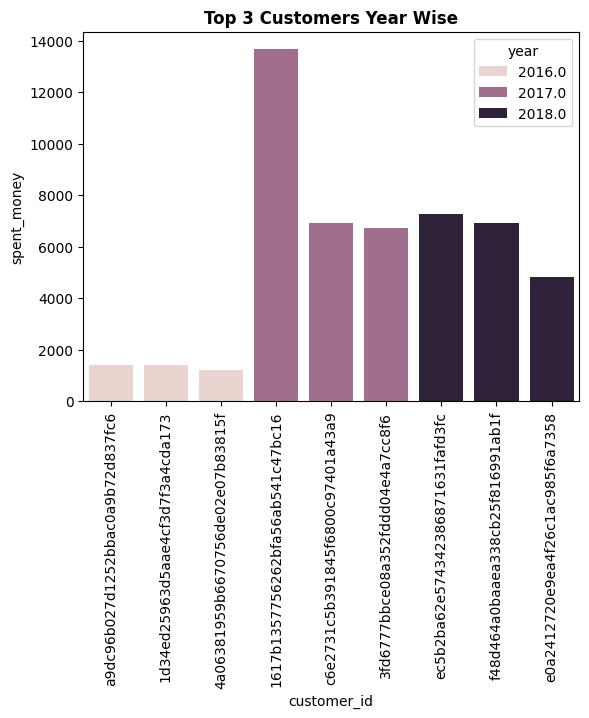

In [15]:
sns.barplot(data=df,x='customer_id',y='spent_money',hue='year')
plt.title('Top 3 Customers Year Wise',fontweight='bold')
plt.xticks(rotation=90)
plt.show()